In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns # improves plot aesthetics
from sklearn import preprocessing

In [2]:
# open dataframe
path = r'C:\Users\Renzo\Documents\Ren\Proyectos\futbol_empirico\SARMIENTO'
df = pd.read_csv(path + '/estadisticas_sud_final_v1.csv', index_col = 0)
#df = pd.read_excel(path + '/clean_PN_20_21.xlsx', index_col = 0)

In [3]:
# shape of df
print(df.shape)

df.head()

(6760, 107)


,Fecha,Partido,Competición,Duración,Seleccionar esquema,Goles,xG,Tiros,Tiros a la portería,% tiros a portería,...,Saques de meta,Intensidad de paso,Promedio pases por posesión del balón,Lanzamiento largo %,Distancia media de tiro,Longitud media pases,PPDA,Equipo,Localia,xGA
0,2020-02-09,12 de Octubre - Cerro Porteño 1:4,Paraguay. Division Profesional,99,4-1-4-1 (30.81%),1,1.32,7,2,28.57,...,18,13.14,2.22,15.15,15.50,20.22,16.68,12 de Octubre,L,3.45
1,2020-02-09,12 de Octubre - Cerro Porteño 1:4,Paraguay. Division Profesional,99,4-4-2 (88.69%),4,3.45,25,8,32.00,...,7,16.71,4.93,8.32,16.17,18.32,4.68,Cerro Porteño,V,1.32
2,2020-10-24,12 de Octubre - General Díaz 2:1,Paraguay. Division Profesional,103,4-4-2 (100.0%),2,3.23,19,9,47.37,...,9,14.59,2.44,16.85,16.01,19.84,11.06,12 de Octubre,L,0.83
3,2020-10-24,12 de Octubre - General Díaz 2:1,Paraguay. Division Profesional,103,4-4-2 (85.37%),1,0.83,6,3,50.00,...,8,14.33,2.72,16.25,16.44,21.40,7.05,General Díaz,V,3.23
4,2020-10-04,12 de Octubre - General Díaz 3:3,Paraguay. Division Profesional,98,4-4-2 (54.7%),3,1.54,13,5,38.46,...,5,15.55,2.67,16.39,17.82,20.58,4.41,12 de Octubre,L,1.57


In [4]:
df.describe()

,Duración,Goles,xG,Tiros,Tiros a la portería,% tiros a portería,Pases,Pases logrados,% pases logrados,"Posesión del balón, %",...,Saques laterales logrados,% saques laterales logrados,Saques de meta,Intensidad de paso,Promedio pases por posesión del balón,Lanzamiento largo %,Distancia media de tiro,Longitud media pases,PPDA,xGA
count,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,...,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6626.000000
mean,96.624852,1.229142,1.248275,11.867012,4.148373,35.213525,359.979290,289.381361,79.189908,50.034691,...,19.969822,88.338249,8.971302,15.320203,3.358639,14.242368,19.953701,21.087809,9.373771,1.240999
std,3.406577,1.140134,0.743622,4.589358,2.343683,15.848111,97.605038,94.866730,6.185425,9.535134,...,6.196752,8.648176,3.581950,1.468146,0.942787,4.886704,3.299395,1.682412,4.274609,0.737809
min,47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,89.000000,55.000000,48.910000,18.470000,...,3.000000,40.000000,0.000000,6.910000,1.190000,3.090000,7.160000,16.180000,2.210000,0.000000
25%,95.000000,0.000000,0.690000,9.000000,2.000000,25.000000,289.000000,219.000000,75.570000,43.367500,...,16.000000,83.330000,6.000000,14.420000,2.660000,10.667500,17.760000,19.930000,6.440000,0.690000
50%,97.000000,1.000000,1.120000,11.000000,4.000000,33.330000,353.000000,281.000000,80.110000,50.040000,...,20.000000,89.470000,9.000000,15.360000,3.250000,13.680000,19.780000,20.950000,8.450000,1.120000
75%,98.000000,2.000000,1.660000,15.000000,5.000000,45.450000,424.000000,350.250000,83.750000,56.690000,...,24.000000,94.740000,11.000000,16.320000,3.910000,17.240000,22.030000,22.102500,11.122500,1.650000
max,124.000000,9.000000,6.210000,38.000000,17.000000,100.000000,762.000000,685.000000,92.940000,81.530000,...,52.000000,100.000000,29.000000,20.300000,8.240000,37.750000,40.960000,29.280000,47.600000,6.210000


In [5]:
# na values??
print('na values: ',np.sum(df[df.isna()].sum()))
df[df.isna()].sum()

na values:  0.0


Fecha                     0
Partido                   0
Competición               0
Duración                0.0
Seleccionar esquema       0
                       ... 
Longitud media pases    0.0
PPDA                    0.0
Equipo                    0
Localia                   0
xGA                     0.0
Length: 107, dtype: object

In [6]:
# count how many matches we have for each competition
df.groupby('Competición').count()['Partido']

Competición
Argentina. Liga Profesional de Fútbol    552
Argentina. Prim B Metro                  424
Argentina. Prim B Nacional               652
Bolivia. LFPB                            245
Brazil. Serie A                          491
Brazil. Serie B                          448
Brazil. Serie C                          274
Brazil. Serie D                          436
Chile. Primera B                         237
Chile. Primera División                  302
Colombia. Primera A                      410
Colombia. Primera B                       95
Costa Rica. Primera División             432
Ecuador. Liga Pro                        340
Paraguay. Division Profesional           370
Peru. Primera División                   481
Uruguay. Primera División                311
Uruguay. Segunda División                 60
Venezuela. Primera División              200
Name: Partido, dtype: int64

In [7]:
# types values of columns
df.dtypes

Fecha                    object
Partido                  object
Competición              object
Duración                  int64
Seleccionar esquema      object
                         ...   
Longitud media pases    float64
PPDA                    float64
Equipo                   object
Localia                  object
xGA                     float64
Length: 107, dtype: object

In [8]:
# is date consider as a timestamp?
print(type(df['Fecha'][0]))
# transform to pandas date form
df['Fecha'] = pd.to_datetime(df['Fecha'])
# is date consider as a date column?
print(type(df['Fecha'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
# min date and max date of matches for each competition
df.groupby(['Competición']).agg({'Fecha': [np.min, np.max]})

Fecha           
                                            amin       amax
Competición                                                
Argentina. Liga Profesional de Fútbol 2019-07-27 2020-03-10
Argentina. Prim B Metro               2019-08-03 2020-03-15
Argentina. Prim B Nacional            2019-08-16 2020-03-17
Bolivia. LFPB                         2019-11-24 2020-03-15
Brazil. Serie A                       2019-11-10 2020-11-09
Brazil. Serie B                       2019-11-12 2020-11-10
Brazil. Serie C                       2020-08-08 2020-11-09
Brazil. Serie D                       2020-09-06 2020-11-13
Chile. Primera B                      2020-01-11 2020-11-08
Chile. Primera División               2019-11-22 2020-11-08
Colombia. Primera A                   2019-11-10 2020-11-09
Colombia. Primera B                   2019-11-10 2020-11-02
Costa Rica. Primera División          2019-11-17 2020-11-12
Ecuador. Liga Pro                     2019-11-23 2020-11-09
Paraguay. Division Profesional        2019-11-10 2020-11-09
Peru. Primera División                2019-11-10 2020-11-10
Uruguay. Primera División             2019-11-10 2020-11-08
Uruguay. Segunda División             2020-08-12 2020-10-30
Venezuela. Primera División           2019-11-10 2020-11-09

In [10]:
# drop Argentina. Copa Argentina
#df = df[df['Competición'] == 'Argentina. Prim B Nacional']
#df.shape

In [11]:
# print columns
for i in df.columns:
    print(i)

Fecha
Partido
Competición
Duración
Seleccionar esquema
Goles
xG
Tiros
Tiros a la portería
% tiros a portería
Pases
Pases logrados
% pases logrados
Posesión del balón, %
Balones perdidos
Balones perdidos bajos
Balones perdidos medios
Balones perdidos altos
Balones recuperados
Balones recuperados bajos
Balones recuperados medios
Balones recuperados altos
Duelos
Duelos ganados
% duelos ganados
Tiros de fuera del área
Ataques posicionales
Ataques posicionales con remate
% ataques posicionales con remate
Contraataques
Contraataques con remate
% contraataques con ataque
Jugadas a balón parado
Córneres
Córneres con remate
% córneres con remate
Tiros libres / con remate
Tiros libres con remate
% tiros libres con remate
Penaltis
Penaltis marcados
% Penaltis marcados
Centros
Centros precisos
% centros precisos
Pases cruzados en profundidad completados
Pases en profundidad completados
Entradas al área de penalti (carreras / pases cruzados)
Entradas al área de penalti (carreras)
Entradas al área d

In [12]:
# define df that we are going to use for the similarity model 
## we are going to adjust by 90 min, so we avoid % values
df_PCA_perc = df.filter(regex='%')
df_PCA_no_perc = df.drop(df_PCA_perc, axis=1)
## we have matches played by each team, so we group by teams and sum
df_PCA_s = df_PCA_no_perc.groupby(['Equipo', 'Competición']).sum()
## normalize per 90 minutes
df_PCA_s = df_PCA_s.apply(lambda x: (x/df_PCA_s.Duración)*90)
df_PCA_s.drop('Duración', axis=1, inplace=True)
df_PCA = df_PCA_s.add_suffix('_90').reset_index()
# calculate de mean of % columns by group of teams and comps (we have match data)
df_PCA_perc[['Equipo','Competición']] = df_PCA[['Equipo','Competición']]
df_PCA_perc_avg = df_PCA_perc.groupby(['Equipo', 'Competición']).mean()
## organize columns
df_PCA = pd.merge(df_PCA, df_PCA_perc_avg, on=['Equipo','Competición'])
## add most frecuent formation used
df_1 = df[['Equipo','Seleccionar esquema']]
df_1['esquema'] = df_1['Seleccionar esquema'].apply(lambda x: int(x.split(' ')[0].replace('-','')))
df_esquema = df_1.groupby(['Equipo'])['esquema'].apply(lambda x: x.value_counts().index[0])
df_esquema = df_esquema.reset_index()
df_PCA = df_PCA.merge(df_esquema, on='Equipo')

df_PCA

,Equipo,Competición,Goles_90,xG_90,Tiros_90,Tiros a la portería_90,Pases_90,Pases logrados_90,Balones perdidos_90,Balones perdidos bajos_90,...,% pases hacia adelante logrados,% pases hacia atrás logrados,% pases laterales logrados,% Pases largos logrados,% pases en el último tercio logrados,% pases progresivos logrados,% desmarques logrados,% saques laterales logrados,Lanzamiento largo %,esquema
0,12 de Octubre,Paraguay. Division Profesional,0.981308,1.144626,9.953271,3.399533,252.651869,186.518692,104.404206,16.787383,...,64.00,90.91,85.71,50.00,48.65,66.67,50.00,81.25,15.15,442
1,ABC,Brazil. Serie D,1.523272,1.500423,12.440056,5.077574,348.956276,287.136812,83.272214,10.028209,...,82.12,90.77,91.50,80.49,84.44,84.81,50.00,100.00,8.32,442
2,ADR Jicaral,Costa Rica. Primera División,1.195929,1.173028,11.679389,4.173028,265.979644,206.335878,94.554707,15.826972,...,78.90,85.71,71.05,69.57,67.92,76.39,0.00,90.32,16.85,532
3,Academia Cantolao,Peru. Primera División,1.035333,1.176582,9.613804,2.995070,330.345111,271.183237,96.396878,16.010682,...,62.50,96.77,82.52,60.87,57.14,67.19,0.00,86.21,16.25,4231
4,Academia Puerto Cabello,Venezuela. Primera División,0.818926,0.959782,10.482257,3.275705,286.378526,228.152866,95.978162,16.542311,...,73.47,87.18,83.96,66.10,74.07,84.71,40.00,82.35,16.39,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Yaracuyanos,Venezuela. Primera División,1.143187,0.771132,9.457275,3.325635,296.916859,234.769053,92.806005,13.822171,...,71.17,88.89,77.55,58.00,67.24,82.81,33.33,85.71,17.18,442
381,Ypiranga Erechim,Brazil. Serie C,1.330377,1.176053,11.374723,3.791574,411.818182,350.354767,88.669623,13.569845,...,65.38,100.00,86.92,61.36,67.31,70.18,0.00,84.62,16.54,4231
382,Zamora,Venezuela. Primera División,1.299213,1.241339,11.811024,4.015748,357.519685,297.755906,88.582677,12.992126,...,65.00,84.21,79.65,53.70,68.52,67.65,0.00,82.86,17.09,442
383,Águia Negra,Brazil. Serie D,1.184211,1.111842,9.210526,3.289474,330.657895,275.263158,77.894737,15.263158,...,67.97,100.00,87.93,58.00,69.23,71.23,50.00,92.00,15.53,4231


In [13]:
# describe pca dataframe
df_PCA.describe()

,Goles_90,xG_90,Tiros_90,Tiros a la portería_90,Pases_90,Pases logrados_90,Balones perdidos_90,Balones perdidos bajos_90,Balones perdidos medios_90,Balones perdidos altos_90,...,% pases hacia adelante logrados,% pases hacia atrás logrados,% pases laterales logrados,% Pases largos logrados,% pases en el último tercio logrados,% pases progresivos logrados,% desmarques logrados,% saques laterales logrados,Lanzamiento largo %,esquema
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.129478,1.144306,10.953526,3.796249,331.505712,266.494139,96.874285,16.265852,34.015010,46.593424,...,69.458208,90.493377,82.704312,56.072026,65.716701,73.760909,36.870234,87.210182,15.973740,2511.298701
std,0.374093,0.272459,1.830615,0.826423,48.774325,49.193334,11.633800,2.811446,5.114293,6.722173,...,7.568930,6.091497,6.925677,8.417623,9.886595,8.868821,27.201708,8.429387,5.033988,1874.776055
min,0.165138,0.318716,4.941764,1.647255,214.585153,148.106362,72.733447,8.000000,21.026393,29.064220,...,42.860000,65.630000,55.770000,32.500000,36.590000,38.360000,0.000000,50.000000,5.320000,343.000000
25%,0.901639,0.979567,9.820282,3.297414,295.643713,230.017699,88.546256,14.284010,30.342270,42.006940,...,63.930000,87.180000,78.470000,50.000000,59.260000,67.690000,16.670000,82.610000,12.320000,442.000000
50%,1.116087,1.127536,10.837696,3.725055,329.988368,267.381818,94.375353,16.396217,33.491099,45.752896,...,69.030000,91.670000,84.210000,55.770000,66.130000,74.190000,33.330000,88.570000,15.910000,4141.000000
75%,1.307692,1.275000,11.834690,4.234059,361.204482,296.354659,104.014401,18.143355,36.923077,51.170360,...,75.170000,94.920000,87.800000,61.970000,72.600000,80.000000,50.000000,93.100000,18.700000,4231.000000
max,2.705411,2.232018,20.069068,8.436112,472.992453,411.962264,134.437781,25.266055,50.210526,68.185907,...,87.500000,100.000000,96.090000,81.630000,92.110000,93.460000,100.000000,100.000000,37.750000,4411.000000


In [14]:
# defensive metrics 
def_cols = ['Posesión del balón, %',
'Balones perdidos_90',
'Balones perdidos bajos_90',
'Balones perdidos medios_90',
'Balones perdidos altos_90',
'Balones recuperados_90',
'Balones recuperados bajos_90',
'Balones recuperados medios_90',
'Balones recuperados altos_90',
'Duelos_90',
'Duelos ganados_90',
'Duelos ofensivos_90',
'Duelos ofensivos ganados_90',
'Duelos defensivos_90',
'Duelos defensivos ganados_90',
'Duelos aéreos_90',
'Duelos aéreos ganados_90',
'Entradas a ras de suelo_90',
'Entradas a ras de suelo logradas_90',
'Interceptaciones_90',
'Despejes_90',
'Faltas_90',
]

In [15]:
# filter defensive metrics and adjust
df_PCA_pos = df_PCA.filter(def_cols)
df_PCA_pos = df_PCA_pos.iloc[:,].apply(lambda x: (2*x)/(1 + np.exp(-0.1*(df_PCA_pos.iloc[:,0]-50))))
df_PCA_pos.drop('Posesión del balón, %', axis=1, inplace=True)
df_PCA_pos = df_PCA_pos.add_suffix('_PAdj')
df_PCA_pos[['Equipo','Competición']] = df_PCA[['Equipo','Competición']]
df_PCA_pos.head()

# reorganize columns in order to have squad and comp first two columns
cols = df_PCA_pos.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_PCA_pos = df_PCA_pos[cols]
df_PCA_pos.head()

# merge adjusted metrics with main dataframe with missing metrics
def_cols = def_cols[1:]
df_PCA = df_PCA.drop(columns=def_cols)
df_PCA = pd.merge(df_PCA, df_PCA_pos, on=['Equipo','Competición'])

print('Shape: ', df_PCA.shape)
df_PCA.head()

Shape:  (385, 103)


,Equipo,Competición,Goles_90,xG_90,Tiros_90,Tiros a la portería_90,Pases_90,Pases logrados_90,Tiros de fuera del área_90,Ataques posicionales_90,...,Duelos ofensivos ganados_90_PAdj,Duelos defensivos_90_PAdj,Duelos defensivos ganados_90_PAdj,Duelos aéreos_90_PAdj,Duelos aéreos ganados_90_PAdj,Entradas a ras de suelo_90_PAdj,Entradas a ras de suelo logradas_90_PAdj,Interceptaciones_90_PAdj,Despejes_90_PAdj,Faltas_90_PAdj
0,12 de Octubre,Paraguay. Division Profesional,0.981308,1.144626,9.953271,3.399533,252.651869,186.518692,4.275701,24.918224,...,6.554156,20.623589,12.066131,17.033857,7.793192,2.176999,1.007441,14.173651,6.808911,3.589732
1,ABC,Brazil. Serie D,1.523272,1.500423,12.440056,5.077574,348.956276,287.136812,5.458392,23.483780,...,46.414138,104.060922,60.825834,48.533505,23.524974,4.662607,2.543240,50.017062,20.345924,28.399518
2,ADR Jicaral,Costa Rica. Primera División,1.195929,1.173028,11.679389,4.173028,265.979644,206.335878,5.597964,24.300254,...,25.689931,59.048852,34.166183,43.117296,21.796078,3.110334,1.210893,34.522328,16.287701,15.385467
3,Academia Cantolao,Peru. Primera División,1.035333,1.176582,9.613804,2.995070,330.345111,271.183237,4.917831,21.409203,...,35.899385,74.363012,43.513211,36.846182,16.095549,8.087224,3.708288,41.619617,18.304742,16.805646
4,Academia Puerto Cabello,Venezuela. Primera División,0.818926,0.959782,10.482257,3.275705,286.378526,228.152866,5.814377,21.537762,...,36.848842,99.575350,58.314187,58.910447,29.693727,8.705390,3.935313,58.671943,25.877666,20.988337


In [16]:
# na values??
print('na values: ',np.sum(df[df.isna()].sum()))
df[df.isna()].sum()

na values:  0.0


Partido                   0
Competición               0
Duración                0.0
Seleccionar esquema       0
Goles                   0.0
                       ... 
Longitud media pases    0.0
PPDA                    0.0
Equipo                    0
Localia                   0
xGA                     0.0
Length: 106, dtype: object

In [17]:
# strip 90 minutes from headers
df_PCA.columns = df_PCA.columns.str.replace('/90', "")
df_PCA.columns = df_PCA.columns.str.replace('.90', "")
df_PCA.columns = df_PCA.columns.str.replace('en los', "")
df_PCA.columns = df_PCA.columns.str.rstrip()

# add xG/Shot and Goal/shot columns
df_PCA['Goles recibidos/Tiros'] = (df_PCA['Goles recibidos'] / df_PCA['Tiros en contra'])
df_PCA['xGA/Tiros'] = (df_PCA['xGA']  / df_PCA['Tiros en contra'])
df_PCA['Goles/Tiros'] = (df_PCA['Goles'] / df_PCA['Tiros'])
df_PCA['xG/Tiros'] = (df_PCA['xG']  / df_PCA['Tiros'])
df_PCA.loc[~np.isfinite(df_PCA['xG/Tiros']), 'xG/Tiros'] = 0
df_PCA.loc[~np.isfinite(df_PCA['Goles recibidos/Tiros']), 'Goles recibidos/Tiros'] = 0
df_PCA.loc[~np.isfinite(df_PCA['xGA/Tiros']), 'xGA/Tiros'] = 0
df_PCA.loc[~np.isfinite(df_PCA['Goles/Tiros']), 'Goles/Tiros'] = 0

print('Shape: ', df_PCA.shape)
df_PCA.head()

Shape:  (385, 107)


,Equipo,Competición,Goles,xG,Tiros,Tiros a la portería,Pases,Pases logrados,Tiros de fuera del área,Ataques posicionales,...,Duelos aéreos ganados_PAdj,Entradas a ras de suelo_PAdj,Entradas a ras de suelo logradas_PAdj,Interceptaciones_PAdj,Despejes_PAdj,Faltas_PAdj,Goles recibidos/Tiros,xGA/Tiros,Goles/Tiros,xG/Tiros
0,12 de Octubre,Paraguay. Division Profesional,0.981308,1.144626,9.953271,3.399533,252.651869,186.518692,4.275701,24.918224,...,7.793192,2.176999,1.007441,14.173651,6.808911,3.589732,0.126471,0.126324,0.098592,0.115000
1,ABC,Brazil. Serie D,1.523272,1.500423,12.440056,5.077574,348.956276,287.136812,5.458392,23.483780,...,23.524974,4.662607,2.543240,50.017062,20.345924,28.399518,0.023810,0.088095,0.122449,0.120612
2,ADR Jicaral,Costa Rica. Primera División,1.195929,1.173028,11.679389,4.173028,265.979644,206.335878,5.597964,24.300254,...,21.796078,3.110334,1.210893,34.522328,16.287701,15.385467,0.107056,0.089903,0.102397,0.100436
3,Academia Cantolao,Peru. Primera División,1.035333,1.176582,9.613804,2.995070,330.345111,271.183237,4.917831,21.409203,...,16.095549,8.087224,3.708288,41.619617,18.304742,16.805646,0.146965,0.127668,0.107692,0.122385
4,Academia Puerto Cabello,Venezuela. Primera División,0.818926,0.959782,10.482257,3.275705,286.378526,228.152866,5.814377,21.537762,...,29.693727,8.705390,3.935313,58.671943,25.877666,20.988337,0.108844,0.082245,0.078125,0.091563


In [18]:
## borre 'Posesión del balón, %', 'esquema', 'entradas area', 'pases ultimo tercio'
shortlist_cols = [
'Equipo', 
'xG',
'Goles',
'xGA',
'Goles recibidos',
'Tiros en contra',
'Tiros',
'Goles recibidos/Tiros',
'xGA/Tiros',
'Goles/Tiros',
'xG/Tiros',
'Tiros de fuera del área',
'Centros',
'Pases',
'Pases progresivos',
'Pases largos',
'Intensidad de paso',
'Promedio pases por posesión del balón',
'Longitud media pases',
'Ataques posicionales con remate',
'Contraataques con remate',
'Balones recuperados_PAdj',
'Duelos defensivos_PAdj',
'Duelos ofensivos_PAdj',
'Duelos aéreos_PAdj',
'Interceptaciones_PAdj',
'Despejes_PAdj',
'Faltas_PAdj',
'Córneres con remate',
'Tiros libres con remate',
'PPDA'
]

In [19]:
# correlation between variables
#corr = df_PCA[shortlist_cols].corr()
#corr.style.background_gradient(cmap='coolwarm')

shape de x_FA (385, 5)
varianza explicada con 4 componentes 86.82563553903582
varianza explicada con 5 componentes 100.00000000000001
varianza explicada con 6 componentes 100.00000000000001
varianza explicada con 7 componentes 100.00000000000001
varianza explicada con 8 componentes 100.00000000000001
varianza explicada con 16 componentes 100.00000000000001
varianza explicada con 20 componentes 100.00000000000001
varianza explicada con 24 componentes 100.00000000000001
varianza explicada con 26 componentes 100.00000000000001
varianza explicada con 30 componentes 100.00000000000001


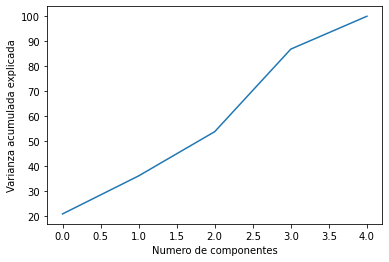

In [20]:
def lower_dimensions(data, n_components, decomposition):
    # tables for x = metrics and y = teams
    #(X, y) = (df_PCA.iloc[:, 2:].values, df_PCA.iloc[:, 0].values)
    (X, y) = (data.iloc[:,1:].values, data.iloc[:, 0].values)

    # standarize
    sc = StandardScaler()
    X_std = sc.fit_transform(X)

    if decomposition == 'PCA':
        # apply PCA
        pca = PCA(n_components=n_components)
        pca.fit(X_std)
        X_decomp = pca.fit_transform(X_std)

        # calculate de variance ratio for componenents
        print('shape de x_PCA', X_decomp.shape)
        expl = pca.explained_variance_ratio_

        components = pca.components_

    elif decomposition == 'FA':
        FA = FactorAnalysis(n_components=n_components, rotation='varimax')
        FA.fit(X_std)
        X_decomp = FA.fit_transform(X_std)

        # calculate de variance ratio for components
        print('shape de x_FA', X_decomp.shape)
        n = FA.noise_variance_
        components = FA.components_

        expl = []
        m1 = components**2
        m2 = np.sum(m1,axis=1)
        for i in range(0,n_components):
            expl.append((100*m2[i])/np.sum(m2))
           
    print('varianza explicada con 4 componentes', sum(expl[0:4]))
    print('varianza explicada con 5 componentes', sum(expl[0:5]))
    print('varianza explicada con 6 componentes', sum(expl[0:6]))
    print('varianza explicada con 7 componentes', sum(expl[0:7]))
    print('varianza explicada con 8 componentes', sum(expl[0:8]))
    print('varianza explicada con 16 componentes', sum(expl[0:16]))
    print('varianza explicada con 20 componentes', sum(expl[0:20]))
    print('varianza explicada con 24 componentes', sum(expl[0:24]))
    print('varianza explicada con 26 componentes', sum(expl[0:26]))
    print('varianza explicada con 30 componentes', sum(expl[0:30]))

    # plot variance ratio 
    plt.plot(np.cumsum(expl))
    plt.xlabel('Numero de componentes')
    plt.ylabel('Varianza acumulada explicada')
    plt.show() 

    return X_decomp, components

#n_components = df_PCA[shortlist_cols].iloc[:,1:].shape[1]
n_components = 5

X_decomp = lower_dimensions(df_PCA[shortlist_cols], n_components, 'FA')

In [21]:
# mean and std should be 0 and 1 (standarization)
variables = shortlist_cols[1:]
comprobacion = pd.DataFrame(data=X_decomp[0], index=df_PCA[shortlist_cols]['Equipo'])
print('na values: ', comprobacion[comprobacion.isna()].sum().sum())
comprobacion.describe()

na values:  0.0


,0,1,2,3,4
count,3.850000e+02,385.000000,3.850000e+02,3.850000e+02,3.850000e+02
mean,-6.920871e-18,0.000000,1.845566e-17,-2.768348e-17,-2.999044e-17
std,1.000527e+00,0.999601,9.990778e-01,9.971532e-01,9.659273e-01
min,-3.355647e+00,-2.451936,-2.798696e+00,-2.177519e+00,-2.179201e+00
25%,-6.202333e-01,-0.556352,-6.779358e-01,-7.447088e-01,-7.289735e-01
50%,-9.990761e-02,-0.097351,1.283777e-02,4.472536e-02,-1.551619e-01
75%,5.514642e-01,0.480387,6.760609e-01,7.027256e-01,7.230482e-01
max,4.982841e+00,4.393860,2.415668e+00,2.722559e+00,2.676239e+00


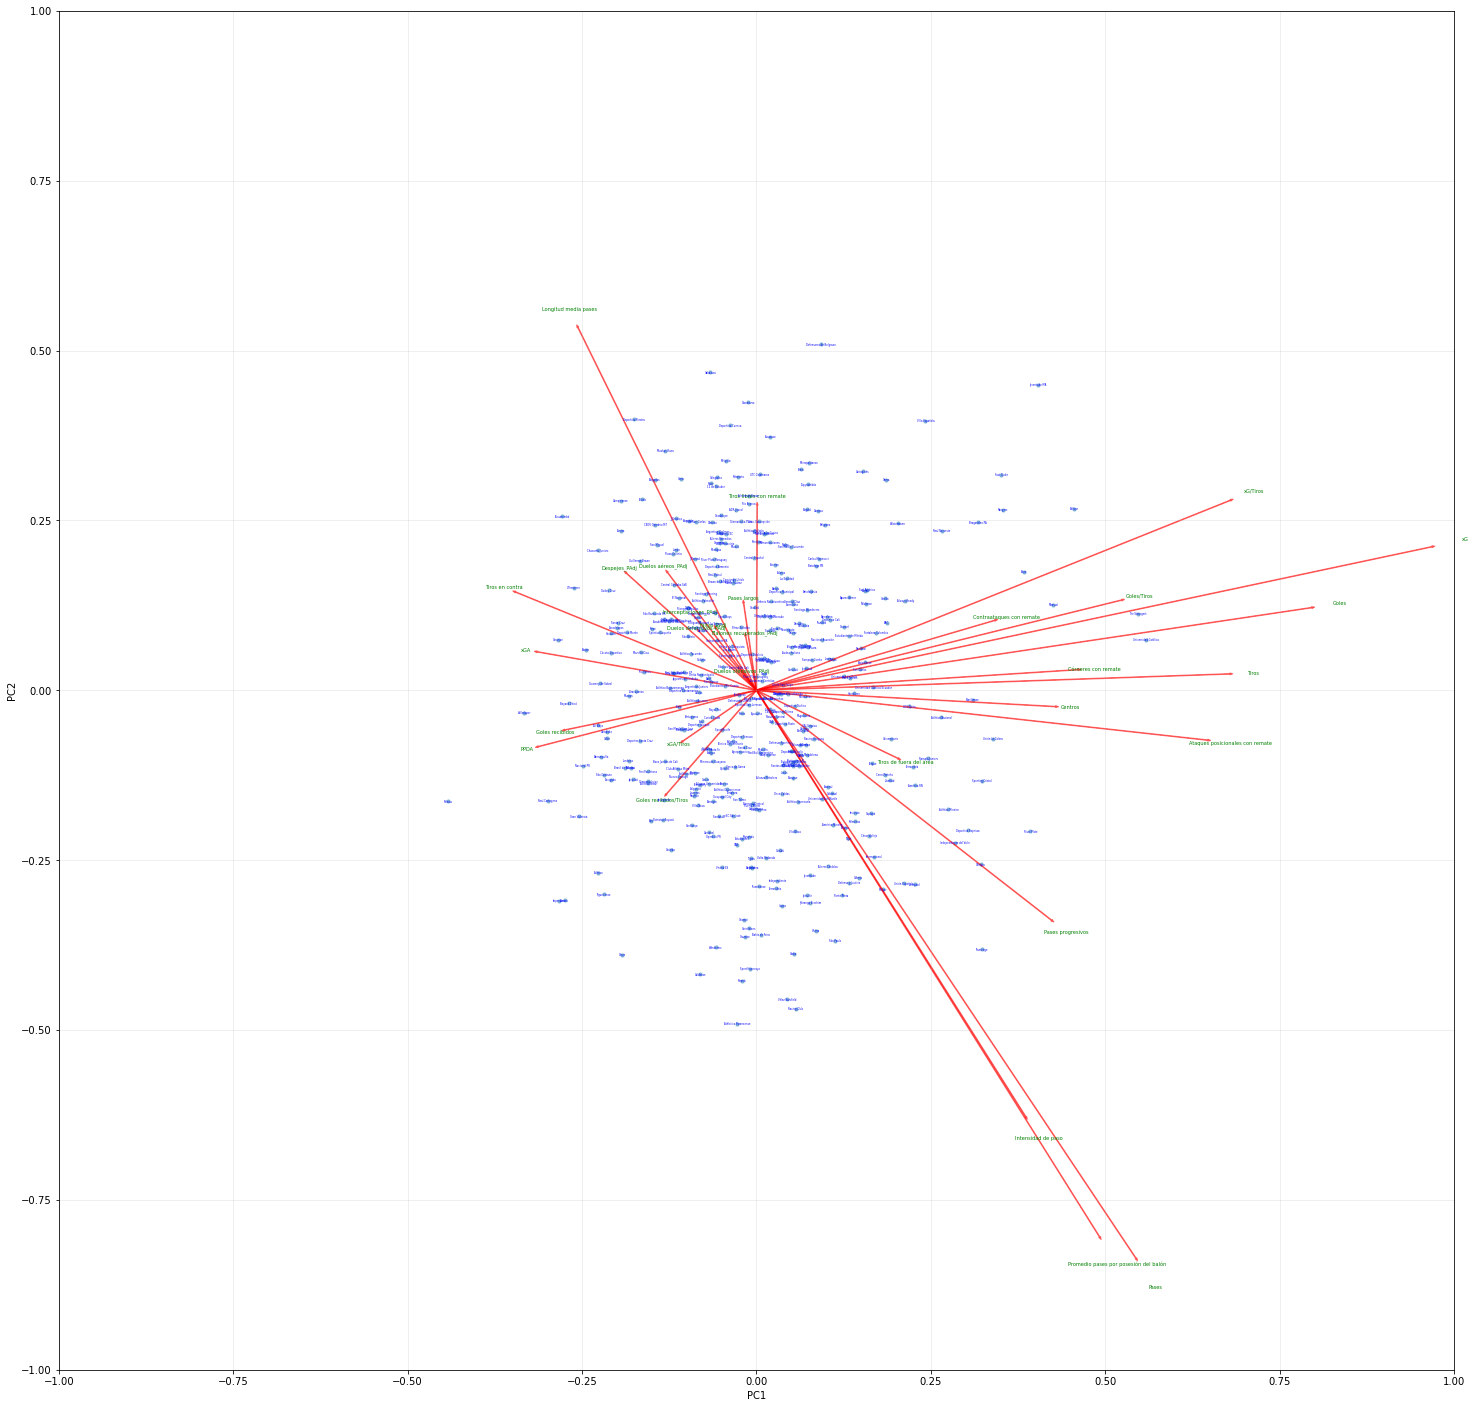

In [20]:
# BIPLOT
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(25,25))
    plt.scatter(xs * scalex, ys * scaley, s=10, alpha=0.45)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), fontsize=5, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, labels[i], fontsize=5, color = 'g', ha = 'center', va = 'center')
    for squad in range(df_PCA.shape[0]):
        plt.text((xs * scalex)[squad], (ys * scaley)[squad], df_PCA.Equipo[squad], fontsize=2.5, color = 'b', ha = 'center', va = 'center')

    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    ax.grid(alpha=0.25)
  
#Call the function. Use only the 8 PCs.
variables = shortlist_cols[1:]
coeff = X_decomp[1]
score = X_decomp[0]

myplot(score[:,0:8], np.transpose(coeff), variables)
plt.show()

In [22]:
# what each component represents
variables = shortlist_cols[1:]
components = X_decomp[1]
map = pd.DataFrame(components, columns=variables)
map[0:16].T.sort_values(by=0, ascending=False).iloc[0:3]

#0 --> Remates
#1 --> Capacidad defensiva
#2 --> Juego en largo
#3 --> Capacidad ofensiva (si en último tercio la jugada termina con remate)
#4 --> Capacidad defensiva (- implica mejor)
#5 --> Pelota parada

,0,1,2,3,4
Tiros,0.986993,-0.062917,-0.128193,-0.046741,0.044113
Ataques posicionales con remate,0.833773,-0.067097,-0.219054,-0.053385,0.112238
Tiros de fuera del área,0.779400,0.100534,-0.038904,-0.082054,-0.178325


In [24]:
# vector for each squad on 16 components and dataframe
df_resultado = pd.DataFrame(data=X_decomp[0][:,0:8], index=[df_PCA['Equipo'], df_PCA['Competición']])
df_resultado.reset_index(inplace=True)
df_resultado.rename(columns={'level_0': 'Equipo'}, inplace=True)
df_resultado.sort_values(by=0, ascending=False)

,Equipo,Competición,0,1,2,3,4
339,The Strongest,Bolivia. LFPB,4.982841,0.491663,-0.527259,-1.146220,-0.606044
240,Mirassol,Brazil. Serie D,4.538805,-0.987846,-0.200802,-0.342500,-0.967214
159,Fast Clube,Brazil. Serie D,4.104210,-1.881737,0.635040,1.977678,-1.364952
19,Always Ready,Bolivia. LFPB,3.510604,0.562960,0.399306,-0.150219,-0.834776
17,Altos,Brazil. Serie D,3.136815,-0.317205,-0.015356,-0.106672,-0.156548
...,...,...,...,...,...,...,...
58,Barranquilla,Colombia. Primera B,-2.119175,0.488661,-0.151982,-0.674399,-1.658860
9,Albion,Uruguay. Segunda División,-2.126716,-2.395416,0.731922,0.257766,-0.020985
281,Rampla Juniors,Uruguay. Segunda División,-2.139217,-0.952547,-1.743856,-0.716854,1.010408
10,Aldosivi,Argentina. Liga Profesional de Fútbol,-2.253636,0.648816,-0.114734,-0.380519,1.066335


In [25]:
# describe pca dataframe
df_resultado.describe()

,0,1,2,3,4
count,3.850000e+02,385.000000,3.850000e+02,3.850000e+02,3.850000e+02
mean,-6.920871e-18,0.000000,1.845566e-17,-2.768348e-17,-2.999044e-17
std,1.000527e+00,0.999601,9.990778e-01,9.971532e-01,9.659273e-01
min,-3.355647e+00,-2.451936,-2.798696e+00,-2.177519e+00,-2.179201e+00
25%,-6.202333e-01,-0.556352,-6.779358e-01,-7.447088e-01,-7.289735e-01
50%,-9.990761e-02,-0.097351,1.283777e-02,4.472536e-02,-1.551619e-01
75%,5.514642e-01,0.480387,6.760609e-01,7.027256e-01,7.230482e-01
max,4.982841e+00,4.393860,2.415668e+00,2.722559e+00,2.676239e+00


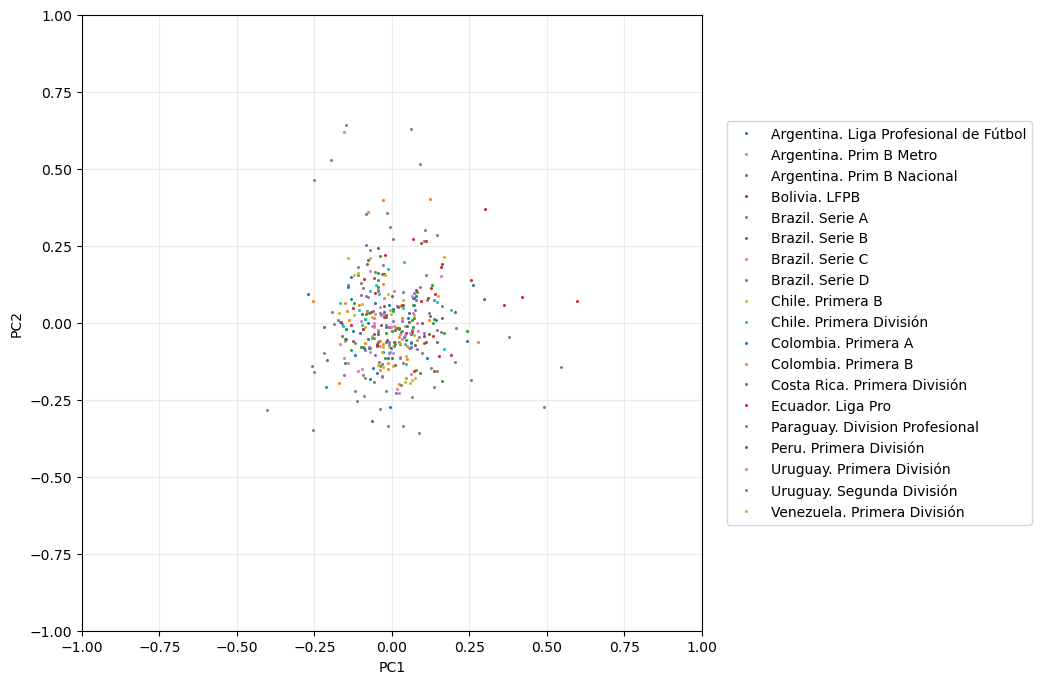

In [87]:
# How close are the squads
plt.style.use('default')

colors_list = list(colors._colors_full_map.values())
df_resultado_v1 = df_resultado.copy()

xs = df_resultado_v1.iloc[:,2]
ys = df_resultado_v1.iloc[:,3]
n = df_resultado_v1.shape[1] - 2
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

df_resultado_v1['x'] =  xs * scalex
df_resultado_v1['y'] =  ys * scaley

fig, ax = plt.subplots(figsize=(8,8))

groups = df_resultado_v1.groupby(['Competición'])

for name, group in groups:
    ax.plot(group.x, group.y, marker='x', linestyle='', ms=1.5, label=name)

plt.legend(numpoints=1, fontsize=10, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

#for squad in range(df_resultado_v1.shape[0]):
#    plt.text(df_resultado_v1.x[squad], df_resultado_v1.y[squad], df_resultado_v1.Equipo[squad], fontsize=2.5, ha = 'left', va = 'bottom')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("PC{}".format(1))
ax.set_ylabel("PC{}".format(2))
ax.grid(alpha=0.25)
  
plt.show()

In [55]:
# squads more likely to with corr between coef of PCA.
def similitud(squad, comp, type):
    if len(comp) > 0:
        # cosine similarity
        comparison_df = df_resultado[df_resultado['Competición'].isin(comp)]
        main_squad = df_resultado[(df_resultado['Equipo'] == squad)].iloc[:,2:]
        if type == 'angulo':
            sim = cosine_similarity(main_squad, comparison_df.iloc[:,2:]).reshape(-1)
        elif type == 'distancia':
            sim = euclidean_distances(main_squad, comparison_df.iloc[:,2:]).reshape(-1)
            #sim = 1 - (sim/np.percentile(sim,100))
            # Gaussian similarity kernel
            #sigma = 1
            #sim = np.exp(-sim**2/(2.*(sigma**2.)))
            sim = 1 / (1 + sim)
        final_df = pd.DataFrame(data = sim, index = [comparison_df.Equipo, comparison_df.Competición])
    else: 
        # cosine similarity
        main_squad = df_resultado[df_resultado['Equipo'] == squad].iloc[:,2:]
        if type == 'angulo':
            sim = cosine_similarity(main_squad, df_resultado.iloc[:,2:]).reshape(-1)
        elif type == 'distancia':
            sim = euclidean_distances(main_squad, df_resultado.iloc[:,2:]).reshape(-1)
            # Gaussian similarity kernel
            #sigma = 1
            #sim = np.exp(-sim**2/(2.*(sigma**2.)))
            sim = 1 / (1 + sim)
        final_df = pd.DataFrame(data = sim, index = [df_resultado.Equipo, df_resultado.Competición])      
    final_df = final_df.reset_index()
    final_df.rename(columns={0: 'Similitud %'}, inplace=True)
    final_df['Similitud %'] = round(final_df['Similitud %']*100, 1)
    final_df = final_df.sort_values(by='Similitud %', ascending=False).head(10)[['Equipo','Competición','Similitud %']]

    return(final_df)

In [65]:
squad = "Atlético Mineiro"
comp = ['Brazil. Serie A'] # vacia toma todas las ligas
similitud(squad, comp, 'distancia')

,Equipo,Competición,Similitud %
2,Atlético Mineiro,Brazil. Serie A,100.0
18,São Paulo,Brazil. Serie A,36.3
14,Palmeiras,Brazil. Serie A,36.3
8,Flamengo,Brazil. Serie A,33.8
1,Atlético GO,Brazil. Serie A,31.8
3,Bahia,Brazil. Serie A,31.7
12,Grêmio,Brazil. Serie A,31.3
6,Corinthians,Brazil. Serie A,31.0
13,Internacional,Brazil. Serie A,28.3
15,Red Bull Bragantino,Brazil. Serie A,27.3


In [62]:
# plot radar with out PCA/FA
def radar_similitud(squad_1, squad_2, type):

    # normalize data
    df_equipo = df_PCA[type]
    x = df_equipo.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_equipo_normalize = pd.DataFrame(x_scaled, columns=type)
    df_equipo_normalize = df_PCA[['Equipo','Competición']].merge(df_equipo_normalize, right_index=True, left_index=True)
    df_equipo_normalize

    # filter data by both teams
    df_PCA_squad_1 = df_equipo_normalize[df_equipo_normalize['Equipo'] == squad_1].iloc[:,2:]
    df_PCA_squad_2 = df_equipo_normalize[df_equipo_normalize['Equipo'] == squad_2].iloc[:,2:]

    # angle of placement of each label (columns) 
    label_placement = np.linspace(start=0, stop=2*np.pi, num=len(df_equipo_normalize.columns[2:]), endpoint=False)

    # open figure
    plt.figure(figsize=(12,12))

    #plot radar (angle, radio, color)
    plt.polar(label_placement,  df_PCA_squad_1.T.values, 'ro', label=squad_1)
    plt.polar(label_placement,  df_PCA_squad_2.T.values, 'bo', label=squad_2)

    # write labels in each label placement
    lines = plt.thetagrids(np.degrees(label_placement), labels = (df_equipo_normalize.columns[2:]), fontsize=9)

    # limits of axis
    plt.ylim(0,1.1)
    plt.yticks(np.linspace(0,1,11))

    # fill colors
    plt.fill(label_placement,  df_PCA_squad_1.T.values, 'ro', alpha=0.25)
    plt.fill(label_placement,  df_PCA_squad_2.T.values, 'bo', alpha=0.25)

    # plot title and legend
    plt.title(squad_1 + ' vs ' + squad_2, fontsize=14, fontweight='bold', color='black')
    plt.legend();

    # print picture
    plt.show()

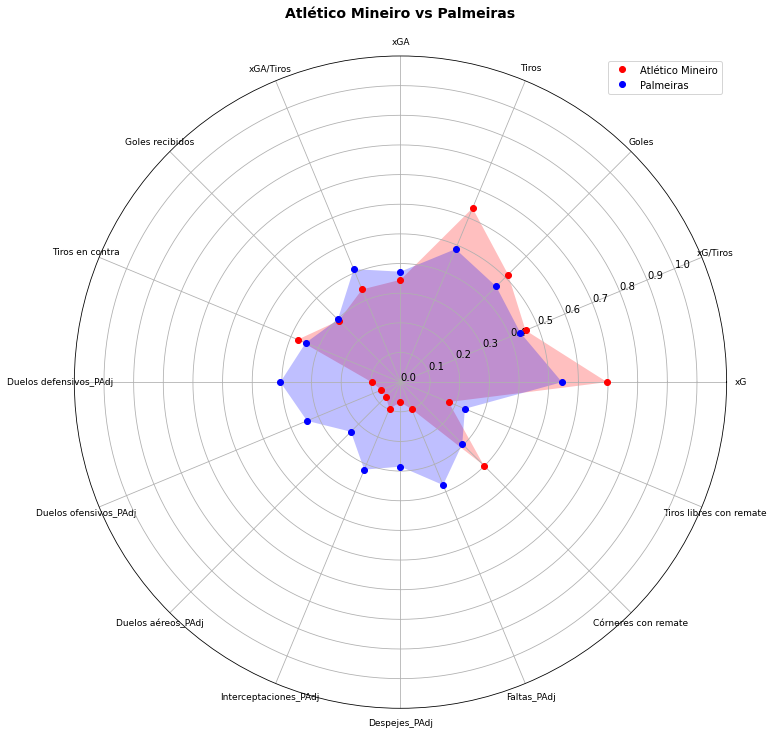

In [63]:
variables_principales = [
'xG',
'xG/Tiros',
'Goles',
'Tiros',
'xGA',
'xGA/Tiros',
'Goles recibidos',
'Tiros en contra',
'Duelos defensivos_PAdj',
'Duelos ofensivos_PAdj',
'Duelos aéreos_PAdj',
'Interceptaciones_PAdj',
'Despejes_PAdj',
'Faltas_PAdj',
'Córneres con remate',
'Tiros libres con remate',
]

variables_estilo = [
'Posesión del balón, %',
'Promedio pases por posesión del balón',
'Intensidad de paso',
'Pases',
'Centros',
'Pases en el último tercio',
'Ataques posicionales con remate',
'Contraataques con remate',
'Longitud media pases',
'Pases largos',
'PPDA',
]

squad_1 = 'Atlético Mineiro'
squad_2 = 'Palmeiras'

radar_similitud(squad_1, squad_2, variables_principales)

In [67]:
## credits to https://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart for main plot. It has been modify so its more comprehensible for myself. 
def data_equipo(equipo, variables):
    if variables == None:
        df_equipo = df_PCA[(df_PCA['Equipo'] == equipo)]
    else:
        df_equipo = df_PCA[(df_PCA['Equipo'] == equipo)][variables]
    return (df_equipo)

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    # for d, (y1, y2) in zip(data[1:], ranges[1:]):
    for d, (y1, y2) in zip(data[0].tolist(), ranges):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)

    x1, x2 = ranges[0]
    d = data[0][0]

    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1

    sdata = [d]

    for d, (y1, y2) in zip(data.tolist()[0][1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1

        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)

    return sdata

def set_rgrids(self, radii, labels=None, angle=None, fmt=None,
               **kwargs):
    """
    Set the radial locations and labels of the *r* grids.
    The labels will appear at radial distances *radii* at the
    given *angle* in degrees.
    *labels*, if not None, is a ``len(radii)`` list of strings of the
    labels to use at each radius.
    If *labels* is None, the built-in formatter will be used.
    Return value is a list of tuples (*line*, *label*), where
    *line* is :class:`~matplotlib.lines.Line2D` instances and the
    *label* is :class:`~matplotlib.text.Text` instances.
    kwargs are optional text properties for the labels:
    %(Text)s
    ACCEPTS: sequence of floats
    """
    # Make sure we take into account unitized data
    radii = self.convert_xunits(radii)
    radii = np.asarray(radii)
    rmin = radii.min()
    # if rmin <= 0:
    #     raise ValueError('radial grids must be strictly positive')

    self.set_yticks(radii)
    if labels is not None:
        self.set_yticklabels(labels)
    elif fmt is not None:
        self.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    if angle is None:
        angle = self.get_rlabel_position()
    self.set_rlabel_position(angle)
    for t in self.yaxis.get_ticklabels():
        t.update(kwargs)
    return self.yaxis.get_gridlines(), self.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            #ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            set_rgrids(ax, grid, labels=gridlabel, angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
            # Fix axis to go in the right order and start at 12 o'clock.
            ax.set_theta_offset(180 / 2)
            ax.set_theta_direction(-1)
            # Make the y-axis labels smaller.
            ax.tick_params(axis='y', labelsize=8)
            # Go through labels and adjust alignment based on where
            # it is in the circle.
            for label, angle in zip(ax.get_xticklabels(), angles):
                if angle in (0, 180):
                    label.set_horizontalalignment('center')
                elif 0 < angle < 180:
                    label.set_horizontalalignment('left')
                else:
                    label.set_horizontalalignment('right')
            # Change the color of the circular gridlines.
            #ax.grid(lw=0.15)
           
        # variables for plotting      
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        l = self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        return l

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

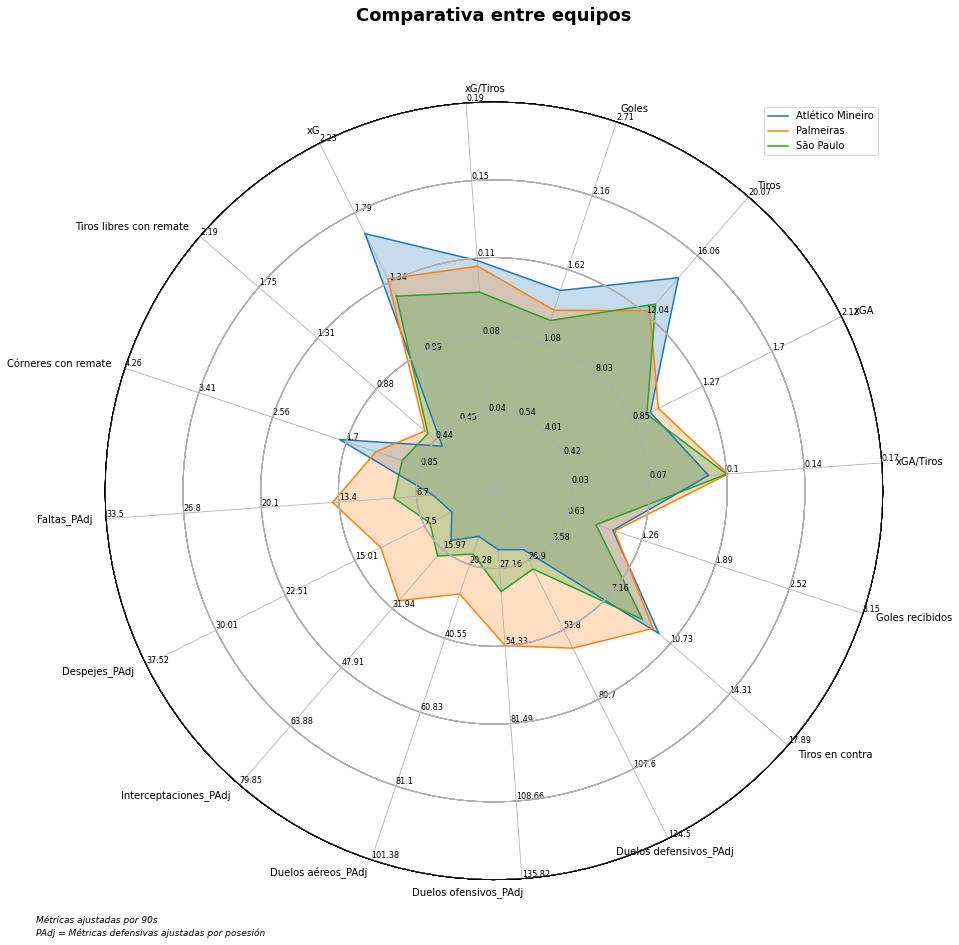

In [70]:
# parameters
equipos = ['Atlético Mineiro', 'Palmeiras', 'São Paulo']
variables = variables_principales
estilo = 'principales'
#variables_estilo
#variables_principales

# setting max ranges for each variable
max_variables = df_PCA[variables].max()
ranges = []
for i in max_variables:
    ranges.append((0,i))         

# open figure
fig1 = plt.figure(figsize=(12, 12))
#fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(polar=True))

radar = ComplexRadar(fig1, variables, ranges)
lax = []
for i,equipo in enumerate(equipos):
    # filling data 
    data = data_equipo(equipo, variables).values
    # plot and fill data
    l, = radar.plot(data, label=equipo) 
    lax.append(l)
    radar.fill(data, alpha=0.25)
    # write team name

# plot title and legend
titulo = 'Comparativa entre equipos'
plt.suptitle(titulo, x=0.55, y=1.11, fontsize=18, fontweight='bold', color='black', ha='center')
#plt.title('Métricas {estilo}'.format(estilo=estilo), fontsize=12, ha='center')
#+ '\nCompetición: ' + data_equipo(equipos[0], None).Competición.iloc[0]
#plt.text(x=0.39, y=1.028, s=equipos[0]  + '\nPartidos: ' + str(df[df['Equipo'] == equipos[0]].count()['Partido']), fontsize=12, ha="left", transform=fig1.transFigure)
#plt.text(x=0.71, y=1.028, s=equipos[1] + '\nPartidos: ' + str(df[df['Equipo'] == equipos[1]].count()['Partido']), fontsize=12, ha="right", transform=fig1.transFigure)
plt.text(x=0.02, y=0.050, s='Métricas ajustadas por 90s', fontsize=9, fontstyle='italic', ha="left", transform=fig1.transFigure)
plt.text(x=0.02, y=0.035, s='PAdj = Métricas defensivas ajustadas por posesión', fontsize=9, fontstyle='italic', ha="left", transform=fig1.transFigure)

legendax = fig1.add_axes([0.8,0.8,0.1,.1]) 
legendax.legend(handles = lax, labels=equipos, loc='best', bbox_to_anchor=(0,0,1,1), bbox_transform=fig1.transFigure)
legendax.axis('off')

# save fig
#plt.savefig('variables_estilo.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()